# Black Friday Dataset EDA And Feature Engineering (Cleaning and Preparing the data for model training)

In [22]:
# dataset link : https://www.kaggle.com/datasets/sdolezel/black-friday

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [23]:
import os
os.listdir('/content/drive/MyDrive/Colab Notebooks/black friday')

['Black_Friday_Dataset.ipynb', 'blackFriday_train.csv', 'blackFriday_test.csv']

In [24]:
# importing the train dataset
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/black friday/blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Note : Whenever you are given splitted dataset ie; train and test datasets you have to always combine the datasets so all the preprocessing operations get performed on all records in both datasets


In [25]:
# importing the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/black friday/blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [26]:
## Merge both train and test data
# we can perform merging using 2 different methods
# merge method (df = pd.merge(df_train, df_test, on='User_ID', how='outer'))

df = pd.concat([df_train, df_test], axis=0, ignore_index=True) # concat method
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [27]:
# Basic EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [28]:
df.shape

(783667, 12)

In [29]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [30]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [31]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [32]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982


In [33]:
# in the above dataset the least useful feature (column) is User_ID so will remove it

df.drop(['User_ID'],axis=1, inplace=True)

In [34]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [35]:
# Feature Engineering

# Handling categorical feature Gender
# One-Hot Encoding
pd.get_dummies(df['Gender'],drop_first=1)
# when it is male it gives True and when it is not (ie; Female) it gives False

,M
0,False
1,False
2,False
3,False
4,True
...,...
783662,False
783663,False
783664,False
783665,False


In [36]:
# but to make it more simpler and memory efficient (since it is a binary categorical feature)

# we will use map function
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [37]:
# Handling categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
# pd.get_dummies(df['Age'],drop_first=True)
# we will not be using dummies instead we will rank the age groups (ordinal data)

df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [39]:
# you can also use label encoding
# but not a good usage in this case
'''
import pandas as pd
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Age'].unique()

'''

"\nimport pandas as pd\nfrom sklearn import preprocessing\n\nlabel_encoder = preprocessing.LabelEncoder()\ndf['Age'] = label_encoder.fit_transform(df['Age'])\ndf['Age'].unique()\n\n"

In [40]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [41]:
# Handling categorical data : City_Category
df_city=pd.get_dummies(df['City_Category'],drop_first=True).astype(int)

In [42]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [43]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [44]:
## drop City_Category Feature
df.drop('City_Category',axis=1, inplace=True)

In [45]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [46]:
## Handling Missing Values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [47]:
## Focus on replacing missing values

# for Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [48]:
# here the values under Product_Category_2 are discrete ie; the above array of values keep on repeating
# Now lets check the count of each value
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [49]:
# since the Product_Category_2 feature has discrete data (Categorical data), we will be using
# Mode to replace the missing values

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [50]:
df['Product_Category_2'].isnull().sum() # replacement completed successfuly

np.int64(0)

In [51]:
# same with Product_Category_3 (replacing missing values)
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [52]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [53]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [54]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [55]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [56]:
# for Stay_In_Current_City_Years

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [57]:
# '4+' can be treated as only '4' instead so we have to replace it
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [58]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [60]:
# Stay_In_Current_City_Years is an object even though it has numerical values
# we have to convert it to int now

# Convert Object into Integer

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

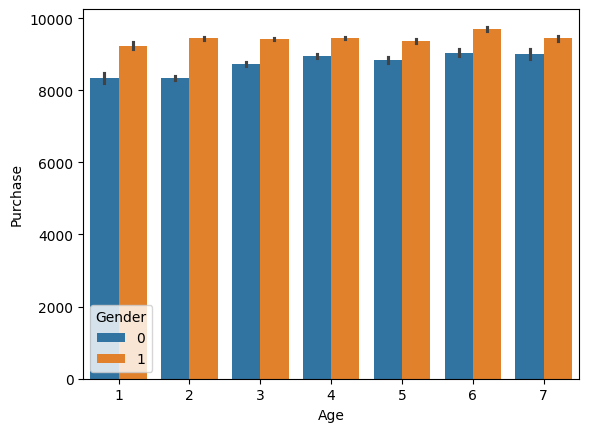

In [62]:
# Visualization of Age vs Purchase

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

Observation : According to the data in all age groups it is evident that men purchase more than women. Also the plot is uniform, therefore Age has less impact on predicting the Purchase amount.

<Axes: xlabel='Occupation', ylabel='Purchase'>

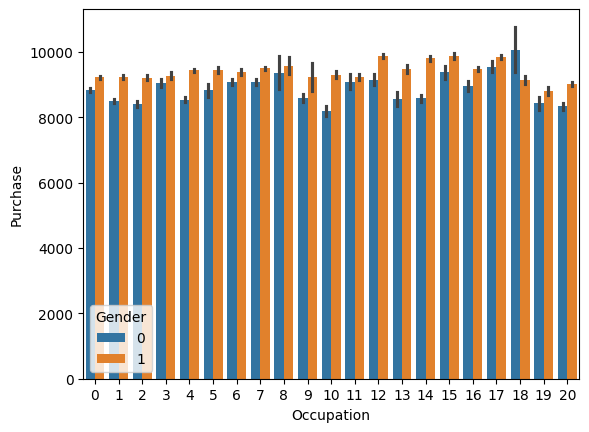

In [63]:
# Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

Observation : Same with the occupation feature the plot is uniform, hence no impact on Purchase amount

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

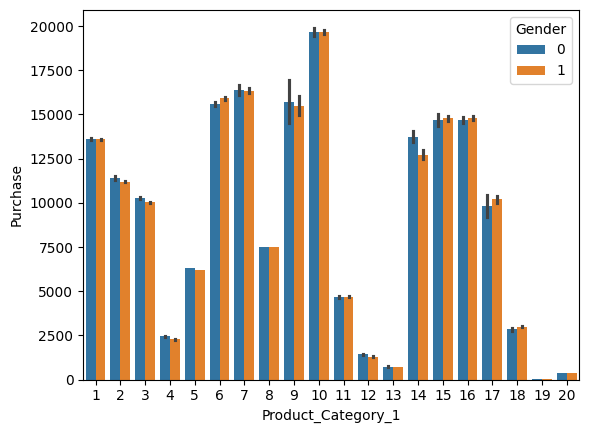

In [64]:
# Visualization of Purchase with Product_Category_1
# we are checking with Product_Category_1 because all the customers have bought Product Category 1 (there was no null values)
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

Observation : This bar plot shows that people who have bought around 10 Product_Category_1 are the overall largest purchasers

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

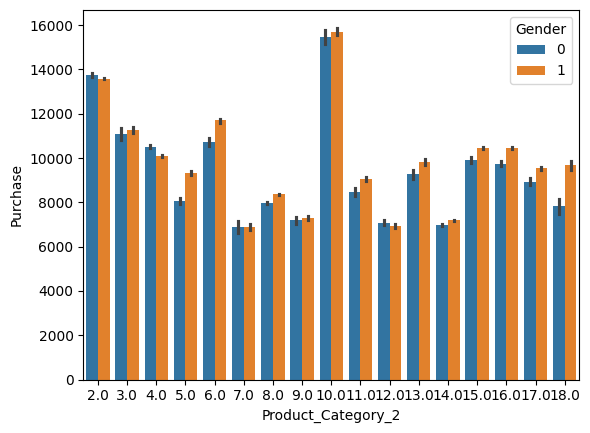

In [65]:
# Product_Category_2
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

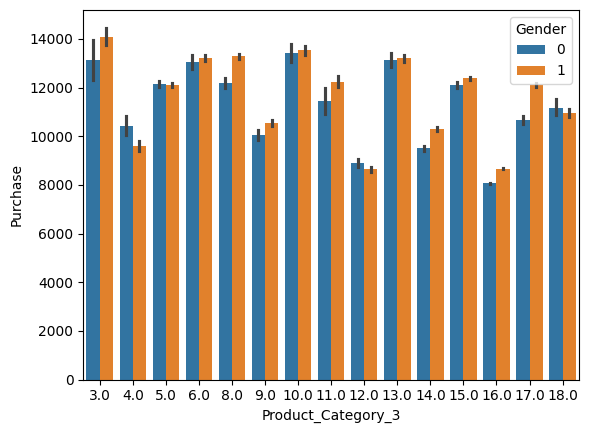

In [66]:
# Product_Category_3
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

Observation : The most purchased product is Product_Category_1

In [67]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [68]:
# Model Building

df_test = df[df['Purchase'].isnull()]
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [69]:
df_train = df[df['Purchase'].notnull()]
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [70]:
X = df_train.drop(['Purchase','Product_ID'],axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [71]:
y = df_train['Purchase']
y

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [73]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# Checking with Linear, Ridge, Lasso, Random Forest & Decision Tree for selecting the best model with the best r2 Score

# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.12948768560712398


In [77]:
# ridge regression

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [78]:
y_pred = ridge.predict(X_test)
print("r2 Score:",r2_score(y_test,y_pred))

r2 Score: 0.12948769558874373


In [79]:
# lasso regressor

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [80]:
y_pred = lasso.predict(X_test)
print("r2 Score:",r2_score(y_test,y_pred))

r2 Score: 0.12948746428725766


In [81]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
y_pred = dt.predict(X_test)
print("r2 Score:",r2_score(y_test,y_pred))

r2 Score: 0.5582839820470993


In [83]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_rf = rf_model.predict(X_test)

In [85]:
r2 = r2_score(y_test, y_rf)
print("R² Score:", r2)

R² Score: 0.6292969345270836


Observation : From the above models only Random Forest Regressor is showcasing a
better performance (not the best) among the other models with a r2 score of 0.629

In [86]:
# lets also perform feature selection using lasso coef to find the feature importance of each feature
# this will help us remove the less impactful features which could otherwise negatively affect the model performance
feature_importance = pd.Series(lasso.coef_,index = X.columns)
print(feature_importance.sort_values(ascending=False))

C                              309.685841
Gender                         218.540943
Age                            160.204351
B                               74.120560
Occupation                      40.013368
Stay_In_Current_City_Years      12.105400
Product_Category_2              -5.644734
Marital_Status                 -27.968336
Product_Category_3            -421.143997
Product_Category_1           -1594.397690
dtype: float64


In [87]:
#  from the lasso coefficients above it is clear that Product_Category_2 and Marital_Status are the 2 less important feature
# lets consider dropping the less important or impactful feature and train_test_split the new dataset again and perform feature selection again.

X_selected = X.drop(columns=["Product_Category_2","Marital_Status"]) # dropping the weak features

X_train,X_test,y_train,y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# feature scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Now lets try linear regressor and random forest regressor models to check for any improvement in the models

# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Updated Model r2 Score:", r2_score(y_test, y_pred))


Updated Model r2 Score: 0.1303687229438344


Observation : Only negligible improvement in performance in linear regression model

In [88]:
# trying with decision tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)
print("r2 Score:",r2_score(y_test,y_pred_dt))

r2 Score: 0.614433170209733


Observation : Big improvement in the model performance, r2 Score increased from 0.5577 to 0.61485

In [89]:
# We will try with Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("r2 Score:", r2_score(y_test, y_pred_rf))

r2 Score: 0.6366246855463501


Observation : A slight improvement in performance (new r2 score = 0.6366) when comparing with the previous random forest model (previous r2 score = 0.6292)

In [93]:
# So now we will try hyperparameter tuning using RandomizedSearchCV on both Random Forest Regressor and Decision Tree Regressor
# And compare the performance of both models to decide which model to be finalized.

# Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# define the parameter grid

param_grid = {

    'n_estimators': np.arange(50, 201, 50),
    'max_depth': np.arange(10, 51, 10),
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']

}

rf = RandomForestRegressor(random_state=42)
random_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2
)

random_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", random_rf.best_params_)
print("Best R² Score:", random_rf.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Parameters: {'n_estimators': np.int64(200), 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': np.int64(30)}
Best R² Score: 0.6519632187147705


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Decision Tree Regressor
param_dist = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'criterion': ['squared_error']
}


random_dt = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_dt.fit(X_train, y_train)

# Best parameters and score
print("Best Decision Tree Parameters:", random_dt.best_params_)
print("Best R2 Score:", random_dt.best_score_)


Best Decision Tree Parameters: {'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(9), 'max_depth': 10, 'criterion': 'squared_error'}
Best R2 Score: 0.6475546490953352


The Random Forest model has a slightly better R² score than the Decision Tree model (0.6519 vs 0.6475).
Random Forest is also generally more robust and less prone to overfitting.
Decision Tree is simpler and faster but may not generalize as well.

In [ ]:
# Save the random forest model
import joblib
joblib.dump(random_rf.best_estimator_, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']